In [1]:
from Game import Kalaha
from Agent import Agent
from MCTS.State import State
from MCTS.MCTS import MCTS
import time
import matplotlib.pyplot as plt
import copy
import random
import numpy as np

## Colab 

In [ ]:
! git clone https://github.com/Holstrup/KalahaAI.git

In [ ]:
import os 
os.chdir("KalahaAI")

In [ ]:
! git checkout Minimax_Alex

## Execution Time

This section explores how long it takes to search through the game states at different depths 

* Iterates over a range, and outputs the execution time of those depths

In [20]:
AI = Agent()

depth = []
timings = []
for i in range(0, 9, 1):
    game = Kalaha()
    AI.search_depth = i
    start = time.time()
    
    AI.find_next_move(game)

    end = time.time()
    
    depth.append(i)
    timings.append(round(end - start, 2))
    

In [25]:
AI = Agent()

depth_ab = []
timings_ab = []
for i in range(0, 11, 1):
    game = Kalaha()
    AI.search_depth = i
    start = time.time()
    
    AI.find_next_move(game, pruning=True)

    end = time.time()
    depth_ab.append(i)
    timings_ab.append(round(end - start, 2))
    

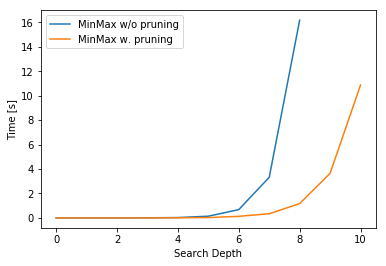

Depth: 0  Time MinMax: 0.0 s  Time MinMax AB Pruning 0.0 s
Depth: 1  Time MinMax: 0.0 s  Time MinMax AB Pruning 0.0 s
Depth: 2  Time MinMax: 0.0 s  Time MinMax AB Pruning 0.0 s
Depth: 3  Time MinMax: 0.01 s  Time MinMax AB Pruning 0.0 s
Depth: 4  Time MinMax: 0.03 s  Time MinMax AB Pruning 0.01 s
Depth: 5  Time MinMax: 0.14 s  Time MinMax AB Pruning 0.03 s
Depth: 6  Time MinMax: 0.68 s  Time MinMax AB Pruning 0.13 s
Depth: 7  Time MinMax: 3.32 s  Time MinMax AB Pruning 0.34 s
Depth: 8  Time MinMax: 16.17 s  Time MinMax AB Pruning 1.17 s


In [26]:
plt.plot(depth, timings, label = "MinMax w/o pruning")
plt.plot(depth_ab, timings_ab, label = "MinMax w. pruning")

plt.xlabel('Search Depth')
plt.ylabel('Time [s]')
plt.legend(loc="upper left")
plt.title("Search Time v. Search Depth")
plt.show()
for i, timing in enumerate(timings): 
    print("Depth: {}  Time MinMax: {} s  Time MinMax AB Pruning {} s".format(i, timing, timings_ab[i]))

In [4]:
def monte_carlo_pred(curr_state, iterations):
    s0 = State(curr_state)
    mcts = MCTS(s0)
    for i in range(iterations):
        n0 = mcts.root_node
        mcts.MCTS(n0)
    return mcts.robust_child()

In [12]:
iterations = [50, 100, 150, 200, 250, 300, 400, 500, 750, 1000, 1500, 2000]
depth_ab = []
timings_ab = []
for i in iterations:
    root = [[4] * 6, [4] * 6, [0, 0]] + [0]
    game = Kalaha()
    
    start = time.time()
    
    monte_carlo_pred(root, i)
    
    end = time.time()
    
    depth_ab.append(i)
    timings_ab.append(round(end - start, 2))

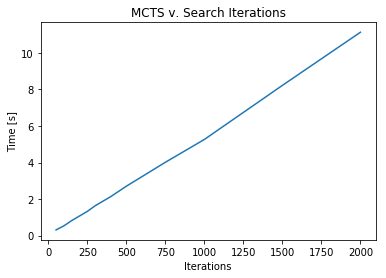

In [20]:
figure = plt.figure()
plt.xlabel('Iterations')
plt.ylabel('Time [s]')
plt.title("MCTS v. Search Iterations")
plt.plot(depth_ab, timings_ab, label = "MinMax w/o pruning")

In [18]:
figure.savefig("foo.pdf", bbox_inches='tight')

## Game Development

This section explores how what the evaluation function evaluates to after each round of the game, at different search depths 

In [46]:
def gameplay(depth, human = False, delay = 0):
    game_development = []
    
    game = Kalaha(starting_player=0)
    ai_1 = Agent()
    ai_2 = Agent()
    
    ai_1.search_depth = depth
    ai_2.search_depth = depth
    
    while not game.terminal_test():
        game_development.append(ai_1.evaluate(game.state))
        time.sleep(delay)
        player = game.state[3]

        if player == game.player1:
            game_copy = copy.deepcopy(game)
            hole = ai_1.find_next_move(game_copy)
            game.take(hole)

        else:
            game_copy = copy.deepcopy(game)
            hole = game.possible_actions()[0]           # <- Stupid Agent 
            # hole = random.choice(game.possible_actions()) # <- Random Agent 
            # hole = ai_2.find_next_move(game_copy)       # <- MinMax Agent
            game.take(hole)

        #game.print_board()
    game.finalize_game()
    #game.print_board()
    return game_development

In [30]:
game_series = []
depths = []
for i in range(2, 9, 2):
    depths.append(i)
    game_series.append(gameplay(depth = i))

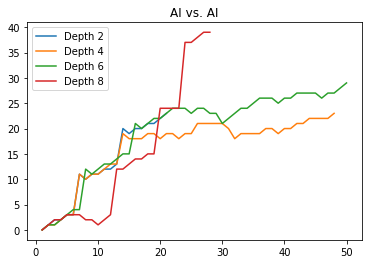

In [36]:
for i, series in enumerate(game_series):
    plt.plot(range(1,len(series) + 1, 1), series, label="Depth {}".format(depths[i]))
plt.title("AI vs. AI")
plt.legend(loc="upper left")
plt.show()


This plot shows us what happens when a MinMax agent plays against another MinMax agent. A higher depth does not yield a bigger win, probably because it is also facing a better opponent. 

Now replace the MinMax agent for player 2, with the stupid agent in the Gameplay function

In [47]:
game_series = []
depths = []
for i in range(2, 9, 2):
    depths.append(i)
    game_series.append(gameplay(depth = i))

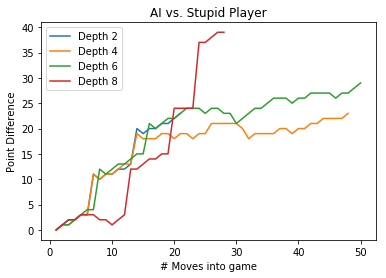

In [49]:
figure = plt.figure()
for i, series in enumerate(game_series):
    plt.plot(range(1,len(series) + 1, 1), series, label="Depth {}".format(depths[i]))
plt.title("AI vs. Stupid Player")
plt.legend(loc="upper left")
plt.xlabel('# Moves into game')
plt.ylabel('Point Difference')
plt.show()
figure.savefig("AIvStupid.pdf", bbox_inches='tight')

This time we see, that a higher depth yields a bigger (and quicker) win. Especially at depth 7, the AI is able to win with ~30 points, after ~20 rounds. 

## Win Rates

In [103]:
def gameplay(depth, human = False, delay = 0):
    game_development = []
    
    game = Kalaha(starting_player=0)
    ai_1 = Agent()
    
    ai_1.search_depth = depth
    
    while not game.terminal_test():
        game_development.append(ai_1.evaluate(game.state))
        time.sleep(delay)
        player = game.state[3]

        if player == game.player1:
            game_copy = copy.deepcopy(game)
            hole = ai_1.find_next_move(game_copy, pruning=True)
            game.take(hole)

        else:
            game_copy = copy.deepcopy(game)
            hole = random.choice(game.possible_actions()) # <- Random Agent 
            game.take(hole)

            
    game.finalize_game()
    return game.state[2][0] - game.state[2][1]

In [93]:
game_iterations = 1000
depth = 3

game_series = np.zeros(game_iterations)
random.seed(42)

for i in range(0, game_iterations, 1):
    evaluation = gameplay(depth = depth)
    game_series[i] = evaluation 

In [94]:
win_rate = np.size(np.where(game_series > 0)) / np.size(game_series) * 100
max_win = np.max(game_series)
max_loss = np.min(game_series)
mean_points = np.mean(game_series)
print("Win Rate: {} %".format(win_rate))
print("Biggest Win: {}".format(max_win))
print("Biggest Loss: {}".format(max_loss))
print("Mean Points: {}".format(mean_points))

Win Rate: 98.1 %
Biggest Win: 40.0
Biggest Loss: -16.0
Mean Points: 23.844


## Game State Exploration

In [175]:
def gameplay(depth, human = False, delay = 0):
    
    game = Kalaha(starting_player=0)
    ai_1 = Agent()
    ai_2 = Agent()
    
    ai_1.search_depth = depth
    ai_2.search_depth = depth
    game_length = 1
    branching_factor = []
    while not game.terminal_test():
        time.sleep(delay)
        player = game.state[3]
        branching_factor.append(len(game.possible_actions()))
        
        if player == game.player1:
            game_copy = copy.deepcopy(game)
            hole = ai_1.find_next_move(game_copy, pruning=True)
            game.take(hole)

        else:
            game_copy = copy.deepcopy(game)
            hole = ai_2.find_next_move(game_copy, pruning=True)      # <- MinMax Agent
            game.take(hole)
        game_length += 1

    game.finalize_game()
    branching_factor = np.array(branching_factor)
    return game_length, np.mean(branching_factor)

In [184]:
game_iterations = 1
depth = 3

game_length = np.zeros(game_iterations)
branching_factor = np.zeros(game_iterations)

for i in range(0, game_iterations, 1):
    if i % 10 == 0: print(i)
    length, branching = gameplay(depth = depth)
    game_length[i] = length 
    branching_factor[i] = branching

0


In [185]:
print("Average Game Length: {}".format(np.mean(game_length)))
print("Average Game Length: {}".format(np.mean(branching_factor)))
print("Estimated State Space {}".format(np.mean(branching_factor) ** np.mean(game_length)))

Average Game Length: 49.0
Average Game Length: 3.9791666666666665
Estimated State Space 2.453659891028686e+29


## Heuristics - Not Done

In [21]:
search_depth = 6

In [39]:
def gameplay(depth, heuristic1, heuristic2):
    game_development = []
    
    game = Kalaha(starting_player=0)
    ai_1 = Agent()
    ai_2 = Agent()
    
    ai_1.evaluate = heuristic1
    ai_2.evaluate = heuristic2
    
    ai_1.search_depth = depth
    ai_2.search_depth = depth
    
    while not game.terminal_test():
        game_development.append(ai_1.evaluate(game.state))
        player = game.state[3]

        if player == game.player1:
            game_copy = copy.deepcopy(game)
            hole = ai_1.find_next_move(game_copy)
            game.take(hole)

        else:
            game_copy = copy.deepcopy(game) 
            hole = ai_2.find_next_move(game_copy)       # <- MinMax Agent
            game.take(hole)

    game.finalize_game()
    return game_development

* **H1: Hoard as many counters as possible in one pit** <br>
This heuristic, with a look ahead of one move, works by attempting to keep as many counters as possible in the left-most pit on the board. At the end of the game, all the counters on a side of the board are awarded to that player’s side. There is some evidence in literature that this is the best pit in which hoard counters.
* **H2: Keep as many counters on the players' own side.** <br>
This heuristic is a generalized version of H1 and is based on the same principles.
* **H3: Have as many moves as possible from which to choose.** <br>
This heuristic has a look ahead of one and explores the possible benefit of having more moves to choose from.
* **H4: Maximize the amount of counters in a player's own store**. <br>
This heuristic aims to pick a move that will maximize the amount of counters captured. It has a look ahead of one.
* **H5: Move the counters from the pit closest to the opponent's side** <br>
This heuristic, with a look ahead of one, aims to make a move from the right-most pit on the board. If it is empty, then the next pit is checked and so on. It was chosen because it has a good performance in Kalah [18] and the perfect player’s opening move in Awari is to play from the rightmost pit
* **H6: Keep the opponents score to a minimum** <br>
This heuristic, with a look ahead of two moves, attempts to minimize the number of counters an opponent can win on their next move

In [42]:
def h1(state):
    """
    Hoard as many counters as possible in one pit
    """
    return state[0][5] - state[1][5]

def h2(state):
    """
    Keep as many counters on the players' own side.
    """
    return max( max(state[0]), state[2][0]) - max( max(state[1]), state[2][1])
    

def h4(state):
    """
    Maximize the amount of counters in a player's own store
    """
    return state[2][0] - state[2][1]

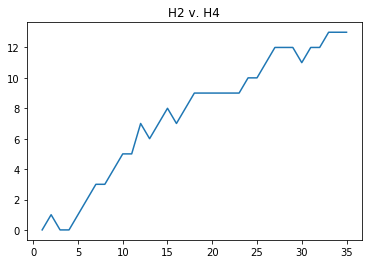

In [44]:
game_series = gameplay(search_depth, h2, h4)

plt.plot(range(1,len(game_series) + 1, 1), game_series)
plt.title("H2 v. H4")
plt.show()

## Monte Carlo Tree Search

The Monte Carlo Pred function takes the current state of the game, and the number of iterations MCTS should be run. It uses the state, to initialize a root node, and runs MCTS from there. Finally, it returns the **Robust Child** of the root node. The Robust Child is the most visited child node to the root node. 

In [2]:
def monte_carlo_pred(curr_state, iterations):
    s0 = State(curr_state)
    mcts = MCTS(s0)
    for i in range(iterations):
        n0 = mcts.root_node
        mcts.MCTS(n0)
    return mcts.robust_child()

In [17]:
def main(mcts_iterations):
    game = Kalaha(starting_player=0)
    
    MM_AB = Agent()
    
    MM_AB.search_depth = 2 # <- Minimax Alpha Beta Pruning - Depth
    
    while not game.terminal_test():

        player = game.state[3]
        
        if player == game.player1:
            game_copy = copy.deepcopy(game)
            hole = monte_carlo_pred(game_copy.state, mcts_iterations) # <- MCTS Action
            game.take(hole)
            
        else:
            game_copy = copy.deepcopy(game)
            hole = MM_AB.find_next_move(game_copy) # <- Minimax Agent
            game.take(hole)
            
    game.finalize_game()
    game.print_board()
    # Returning the difference in points
    return game.state[2][0] - game.state[2][1]

In [19]:
repetitions = 0
iterations = [50, 100, 500, 1000, 2000] 
ai_search_depths = [2, 4, 6]
results = []
for search_depth in ai_search_depths:
    for j in iterations:
        win_rates = []
        game_series = []

        for i in range(repetitions + 1):
            print(search_depth, j, i)
            game_series.append(main(j))

        game_series = np.array(game_series)
        win_rate = np.size(np.where(game_series > 0)) / np.size(game_series) * 100
        win_rates.append(win_rate)
        print("Full Game Series:", game_series)
    
    results.append(win_rates)

2 50 0


  -------------
 | 0|0|0|0|0|0 | 
29|             |19
 | 0|0|0|0|0|0 | 
  -------------


----------
Full Game Series: [-10]
2 100 0


  -------------
 | 0|0|0|0|0|0 | 
33|             |15
 | 0|0|0|0|0|0 | 
  -------------


----------
Full Game Series: [-18]
2 500 0


  -------------
 | 0|0|0|0|0|0 | 
26|             |22
 | 0|0|0|0|0|0 | 
  -------------


----------
Full Game Series: [-4]
2 1000 0


  -------------
 | 0|0|0|0|0|0 | 
37|             |11
 | 0|0|0|0|0|0 | 
  -------------


----------
Full Game Series: [-26]
2 2000 0


  -------------
 | 0|0|0|0|0|0 | 
21|             |27
 | 0|0|0|0|0|0 | 
  -------------


----------
Full Game Series: [6]
4 50 0


  -------------
 | 0|0|0|0|0|0 | 
29|             |19
 | 0|0|0|0|0|0 | 
  -------------


----------
Full Game Series: [-10]
4 100 0


  -------------
 | 0|0|0|0|0|0 | 
23|             |25
 | 0|0|0|0|0|0 | 
  -------------


----------
Full Game Series: [2]
4 500 0


KeyboardInterrupt: 

In [ ]:
plt.plot(iterations, results)
plt.title("MCTS vs. Random Agent")
#plt.legend(loc="upper left")
plt.show()

In [ ]:
for i, series in enumerate(results):
    plt.plot(range(1,len(series) + 1, 1), iterations, label="Depth {}".format(ai_search_depths[i]))
plt.title("AI vs. Stupid Player")
plt.legend(loc="upper left")
plt.show()

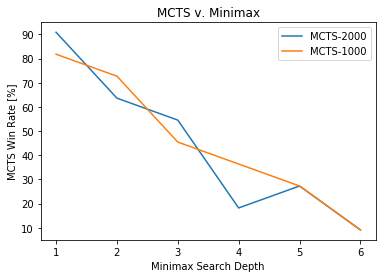

In [9]:
ai_search_depths = [1, 2, 3, 4, 5, 6]
MCTS_2000 = [90.9090909090909, 
             63.63636363636363,
             54.54545454545454,
             18.181818181818183,
             27.27272727272727,
             9.090909090909092]
MCTS_1000 = [81.81818181818183,
 72.72727272727273,
 45.45454545454545,
 36.36363636363637,
 27.27272727272727,
 9.090909090909092]
plt.plot(ai_search_depths, MCTS_2000, label="MCTS-2000")
plt.plot(ai_search_depths, MCTS_1000, label="MCTS-1000")
plt.title("MCTS v. Minimax")
plt.xlabel('Minimax Search Depth')
plt.ylabel('MCTS Win Rate [%]')
plt.legend(loc="upper right")
plt.show()
